## MACHINE FAILURE PROJECT

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### READ THE DATASET

In [2]:
import pandas as pd
df = pd.read_csv('train.csv')
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [3]:
df.isna().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

### SEPERATE X AND Y FEATURES

In [5]:
X= df.drop(columns=['id','Product ID','Machine failure'])
Y = df[['Machine failure']]

In [6]:
X.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0


In [7]:
Y.head()

,Machine failure
0,0
1,0
2,0
3,0
4,0


### SEPERATE CATEGORICAL AND CONTNIOUS FEATURE

In [8]:
cat= list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [9]:
cat

['Type']

In [10]:
con

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

### FIRST PIPELINE USNING ORDINALENCODER

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [12]:
num_pipe= Pipeline(steps=[('impute',SimpleImputer(strategy='median')),
                          ('scaler',StandardScaler())])
cat_pipe= Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),
                          ('ord',OrdinalEncoder())])
pre=ColumnTransformer([('num',num_pipe,con),
                       ('cat',cat_pipe,cat)])

In [13]:
x_pre=pre.fit_transform(X)
x_pre[0:5]

array([[ 0.3958803 , -0.24623038,  0.54541592, -0.49971115,  0.5564169 ,
        -0.03945048, -0.07202055, -0.04901642, -0.06303833, -0.04756777,
         1.        ],
       [ 1.46985559,  1.55860483,  1.72030819, -1.32302768,  1.49443273,
        -0.03945048, -0.07202055, -0.04901642, -0.06303833, -0.04756777,
         2.        ],
       [-0.30220363, -1.04035788,  2.05187289, -1.62883096, -1.24144677,
        -0.03945048, -0.07202055, -0.04901642, -0.06303833, -0.04756777,
         1.        ],
       [ 0.61067536,  0.69228393,  0.0264451 ,  0.46474535,  1.44753193,
        -0.03945048, -0.07202055, -0.04901642, -0.06303833, -0.04756777,
         1.        ],
       [-1.00028757, -0.67939083,  0.86977268, -0.58204281, -1.1007444 ,
        -0.03945048, -0.07202055, -0.04901642, -0.06303833, -0.04756777,
         2.        ]])

In [14]:
cols=pre.get_feature_names_out()
cols

array(['num__Air temperature [K]', 'num__Process temperature [K]',
       'num__Rotational speed [rpm]', 'num__Torque [Nm]',
       'num__Tool wear [min]', 'num__TWF', 'num__HDF', 'num__PWF',
       'num__OSF', 'num__RNF', 'cat__Type'], dtype=object)

In [15]:
x_pre=pd.DataFrame(x_pre,columns=cols)
x_pre.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
1,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
3,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0


### CALCULATING MUTUAL INFORMATION SCORES

In [16]:
from sklearn.feature_selection import mutual_info_classif 

In [17]:
mi = mutual_info_classif(x_pre,Y)
mi

array([0.00532599, 0.00226791, 0.01923883, 0.0194108 , 0.00728645,
       0.0080787 , 0.02464398, 0.01092499, 0.01934337, 0.00138819,
       0.01025003])

In [18]:
mi=pd.Series(mi)
mi.index=cols
mi =mi.sort_values(ascending=False)
mi

num__HDF                        0.024644
num__Torque [Nm]                0.019411
num__OSF                        0.019343
num__Rotational speed [rpm]     0.019239
num__PWF                        0.010925
cat__Type                       0.010250
num__TWF                        0.008079
num__Tool wear [min]            0.007286
num__Air temperature [K]        0.005326
num__Process temperature [K]    0.002268
num__RNF                        0.001388
dtype: float64

<Axes: title={'center': 'Mutual Info Scores'}>

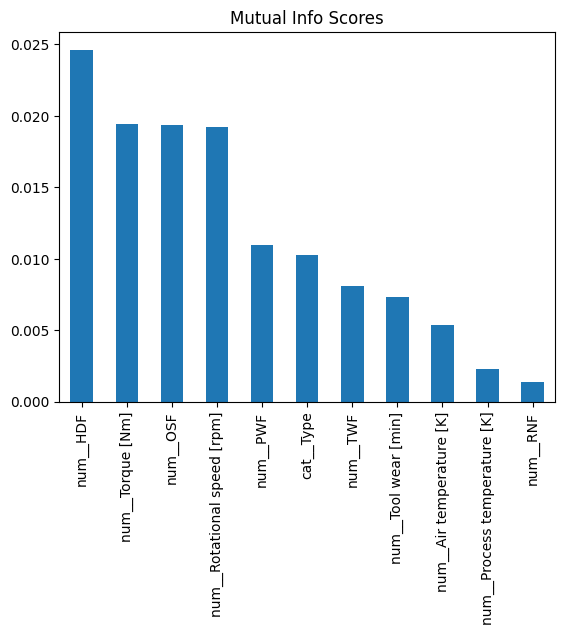

In [19]:
mi.plot(kind='bar',title='Mutual Info Scores')

In [20]:
sel_cols=list(mi.index)

In [21]:
imp_cols= []

In [22]:
sel_cols[0].split('__')[1]

'HDF'

In [23]:
for i in sel_cols:
    s=i.split('__')[1]
    imp_cols.append(s)

    

In [24]:
imp_cols

['HDF',
 'Torque [Nm]',
 'OSF',
 'Rotational speed [rpm]',
 'PWF',
 'Type',
 'TWF',
 'Tool wear [min]',
 'Air temperature [K]',
 'Process temperature [K]',
 'RNF']

In [25]:
x_sel=X[imp_cols]

### CREATING FINAL PIPELINE --> ONEHOTENCODER

In [26]:
from sklearn.preprocessing import OneHotEncoder

In [27]:
cat_sel= list(x_sel.columns[x_sel.dtypes=='object'])
con_sel = list(x_sel.columns[x_sel.dtypes!='object'])

In [28]:
cat_sel

['Type']

In [29]:
con_sel

['HDF',
 'Torque [Nm]',
 'OSF',
 'Rotational speed [rpm]',
 'PWF',
 'TWF',
 'Tool wear [min]',
 'Air temperature [K]',
 'Process temperature [K]',
 'RNF']

In [30]:
num_pipe1= Pipeline(steps=[('impute',SimpleImputer(strategy='median')),
                          ('scaler',StandardScaler())])
cat_pipe1= Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),
                          ('ohe',OneHotEncoder(handle_unknown='ignore'))])
pre2=ColumnTransformer([('num',num_pipe1,con_sel),
                       ('cat',cat_pipe1,cat_sel)])

In [33]:
x_sel_pre=pre2.fit_transform(x_sel)
x_sel_pre

array([[-0.07202055, -0.49971115, -0.06303833, ...,  0.        ,
         1.        ,  0.        ],
       [-0.07202055, -1.32302768, -0.06303833, ...,  0.        ,
         0.        ,  1.        ],
       [-0.07202055, -1.62883096, -0.06303833, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.07202055, -0.2174312 , -0.06303833, ...,  0.        ,
         1.        ,  0.        ],
       [-0.07202055,  0.69997864, -0.06303833, ...,  0.        ,
         1.        ,  0.        ],
       [-0.07202055, -0.12333789, -0.06303833, ...,  0.        ,
         1.        ,  0.        ]])

In [34]:
final_cols=pre2.get_feature_names_out()
final_cols

array(['num__HDF', 'num__Torque [Nm]', 'num__OSF',
       'num__Rotational speed [rpm]', 'num__PWF', 'num__TWF',
       'num__Tool wear [min]', 'num__Air temperature [K]',
       'num__Process temperature [K]', 'num__RNF', 'cat__Type_H',
       'cat__Type_L', 'cat__Type_M'], dtype=object)

In [35]:
x_sel_pre= pd.DataFrame(x_sel_pre,columns=final_cols)
x_sel_pre

,num__HDF,num__Torque [Nm],num__OSF,num__Rotational speed [rpm],num__PWF,num__TWF,num__Tool wear [min],num__Air temperature [K],num__Process temperature [K],num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
0,-0.072021,-0.499711,-0.063038,0.545416,-0.049016,-0.03945,0.556417,0.395880,-0.246230,-0.047568,0.0,1.0,0.0
1,-0.072021,-1.323028,-0.063038,1.720308,-0.049016,-0.03945,1.494433,1.469856,1.558605,-0.047568,0.0,0.0,1.0
2,-0.072021,-1.628831,-0.063038,2.051873,-0.049016,-0.03945,-1.241447,-0.302204,-1.040358,-0.047568,0.0,1.0,0.0
3,-0.072021,0.464745,-0.063038,0.026445,-0.049016,-0.03945,1.447532,0.610675,0.692284,-0.047568,0.0,1.0,0.0
4,-0.072021,-0.582043,-0.063038,0.869773,-0.049016,-0.03945,-1.100744,-1.000288,-0.679391,-0.047568,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,-0.072021,-0.335048,-0.063038,0.069693,-0.049016,-0.03945,1.650769,0.127386,1.053251,-0.047568,0.0,0.0,1.0
136425,-0.072021,1.029305,-0.063038,-0.528565,-0.049016,-0.03945,-1.601020,-1.268781,-1.040358,-0.047568,1.0,0.0,0.0
136426,-0.072021,-0.217431,-0.063038,0.026445,-0.049016,-0.03945,1.713303,0.342182,1.342025,-0.047568,0.0,1.0,0.0
136427,-0.072021,0.699979,-0.063038,-0.528565,-0.049016,-0.03945,-0.975676,0.986567,0.692284,-0.047568,0.0,1.0,0.0


### TRAIN TEST SPLIT

In [36]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x_sel_pre,Y,test_size=0.33,random_state=42)


In [37]:
xtrain.shape

(91407, 13)

In [38]:
xtest.shape

(45022, 13)

### EVALUATING ALGORITHM

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [40]:
dct={'logistic':LogisticRegression(),
     'Decision tree': DecisionTreeClassifier(),
     'Random forest': RandomForestClassifier(),
     'Gradient boosting':GradientBoostingClassifier()}

In [41]:
dct.items()

dict_items([('logistic', LogisticRegression()), ('Decision tree', DecisionTreeClassifier()), ('Random forest', RandomForestClassifier()), ('Gradient boosting', GradientBoostingClassifier())])

### EVALUATE MODEL

In [42]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [43]:
tr=[]
ts=[]
tr_cv=[]

In [44]:
for name,model in dct.items():
    model.fit(xtrain,ytrain)
    ypred_tr=model.predict(xtrain)
    ypred_ts=model.predict(xtest)
    f1_tr=f1_score(ytrain,ypred_tr)
    score= cross_val_score(model,xtrain,ytrain,cv=5,scoring='f1')
    scores=score.mean()
    f1_ts=f1_score(ytest,ypred_ts)
    tr.append(f1_tr)
    ts.append(f1_ts)
    tr_cv.append(scores)

    print('\n--------------------------------------------------------------------------\n')
    print(f'MODEL NAME : {name}')
    print(f'TRAINING F1 SCORE : {f1_tr:.4f}')
    print(f'TESTING F1 SCORE : {f1_ts:.4f}')
    print(f'5 FOLD CROSS VALIDATION F1 SCORE : {scores:.4f}')


--------------------------------------------------------------------------

MODEL NAME : logistic
TRAINING F1 SCORE : 0.8652
TESTING F1 SCORE : 0.8583
5 FOLD CROSS VALIDATION F1 SCORE : 0.8652

--------------------------------------------------------------------------

MODEL NAME : Decision tree
TRAINING F1 SCORE : 0.9952
TESTING F1 SCORE : 0.7488
5 FOLD CROSS VALIDATION F1 SCORE : 0.7539

--------------------------------------------------------------------------

MODEL NAME : Random forest
TRAINING F1 SCORE : 0.9952
TESTING F1 SCORE : 0.8558
5 FOLD CROSS VALIDATION F1 SCORE : 0.8589

--------------------------------------------------------------------------

MODEL NAME : Gradient boosting
TRAINING F1 SCORE : 0.8805
TESTING F1 SCORE : 0.8604
5 FOLD CROSS VALIDATION F1 SCORE : 0.8612


### VIEW RESULTS IN DATAFRAME

In [45]:
eva_dct= {'MODEL':list(dct.keys()),
          'TRAINING F1': tr,
          'TESTING F1':ts,
          'TRAINING F1 CV': tr_cv}

In [46]:
eval_df=pd.DataFrame(eva_dct)
eval_df

,MODEL,TRAINING F1,TESTING F1,TRAINING F1 CV
0,logistic,0.865243,0.858306,0.865181
1,Decision tree,0.995162,0.748775,0.753896
2,Random forest,0.995176,0.855754,0.858854
3,Gradient boosting,0.880460,0.860371,0.861165


### SELECTING GRADIENT BOOSTING ALGORITHM

In [47]:
model= GradientBoostingClassifier(random_state=42)

### HYPER PARAMETER TUNNING FOR GRADIENT BOOSTING MODEL

In [48]:
params={'learning_rate':[0.001,0.005,0.01,0.05,0.1],
        'n_estimators': [10,50,100,200],
        'max_depth': [3,4,5,6,7,8,9,10],
        'min_samples_split':[6,7,8,9,10]}

In [49]:
from sklearn.model_selection import RandomizedSearchCV

In [50]:
rscv= RandomizedSearchCV(model,param_distributions=params,cv=5,scoring='f1')
rscv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
                   param_distributions={'learning_rate': [0.001, 0.005, 0.01,
                                                          0.05, 0.1],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                                        'min_samples_split': [6, 7, 8, 9, 10],
                                        'n_estimators': [10, 50, 100, 200]},
                   scoring='f1')

In [51]:
rscv.best_params_

{'n_estimators': 50,
 'min_samples_split': 6,
 'max_depth': 3,
 'learning_rate': 0.05}

In [52]:
rscv.best_score_

0.8645326243760332

In [54]:
best_model= rscv.best_estimator_
best_model

GradientBoostingClassifier(learning_rate=0.05, min_samples_split=6,
                           n_estimators=50, random_state=42)

### EVALUATING BEST MODEL

In [55]:
best_model.score(xtrain,ytrain)

0.996247552156837

In [56]:
best_model.score(xtest,ytest)

0.9961574341433077

### PREDICTIONS

In [91]:
ypred_tr=best_model.predict(xtrain)
ypred_ts=best_model.predict(xtest)
yprob_tr=best_model.predict_proba(xtrain)[:,1]
yprob_ts=best_model.predict_proba(xtest)[:,1]

In [92]:
ypred_tr[0:5]

array([0, 1, 1, 0, 0], dtype=int64)

In [93]:
ytrain.head()

,Machine failure
20770,0
123635,1
87205,1
53579,0
29338,0


In [94]:
ypred_ts[0:5]

array([1, 0, 0, 0, 0], dtype=int64)

In [95]:
ytest.head()

,Machine failure
123128,1
54705,0
40016,0
75025,0
120421,0


### CONFUSION MATRIX

In [96]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

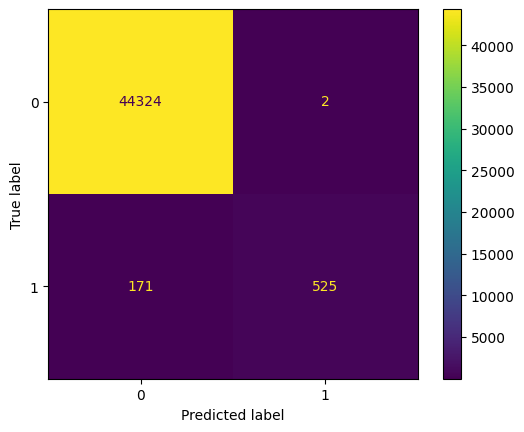

In [97]:
cf=confusion_matrix(ytest,ypred_ts)
cfd=ConfusionMatrixDisplay(cf,display_labels=best_model.classes_)
cfd.plot()

### CLASSSIFICATION REPORT

In [98]:
from sklearn.metrics import classification_report

In [99]:
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44326
           1       1.00      0.75      0.86       696

    accuracy                           1.00     45022
   macro avg       1.00      0.88      0.93     45022
weighted avg       1.00      1.00      1.00     45022



### ROC AUC CURVE

In [100]:
from sklearn.metrics import roc_auc_score,RocCurveDisplay

In [101]:
roc_auc_score(ytrain,yprob_tr)

0.8917660735785706

In [102]:
roc_auc_score(ytest,yprob_ts)

0.883527872253694

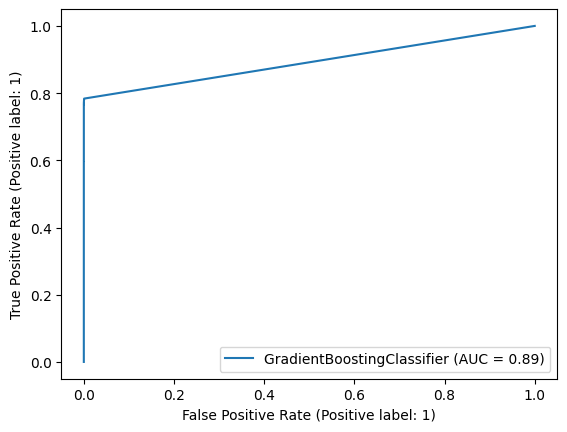

In [103]:
RocCurveDisplay.from_estimator(best_model,xtrain,ytrain)

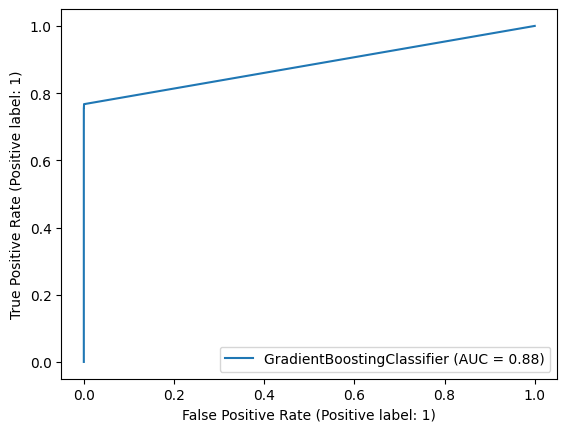

In [104]:
RocCurveDisplay.from_estimator(best_model,xtest,ytest)

### PREDICTING THE TESTING FILE

In [105]:
xnew=pd.read_csv('test.csv')
xnew.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [106]:
xnew_pre=pre2.transform(xnew)
xnew_pre

array([[-0.07202055, -0.27623953, -0.06303833, ...,  0.        ,
         1.        ,  0.        ],
       [-0.07202055, -1.35831267, -0.06303833, ...,  0.        ,
         1.        ,  0.        ],
       [-0.07202055, -0.31152452, -0.06303833, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.07202055,  0.12365707, -0.06303833, ...,  0.        ,
         1.        ,  0.        ],
       [-0.07202055, -0.00572124, -0.06303833, ...,  0.        ,
         1.        ,  0.        ],
       [-0.07202055, -0.49971115, -0.06303833, ...,  0.        ,
         1.        ,  0.        ]])

In [107]:
xnew_pre=pd.DataFrame(xnew_pre,columns=final_cols)
xnew_pre

,num__HDF,num__Torque [Nm],num__OSF,num__Rotational speed [rpm],num__PWF,num__TWF,num__Tool wear [min],num__Air temperature [K],num__Process temperature [K],num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
0,-0.072021,-0.276240,-0.063038,-0.153753,-0.049016,-0.03945,-0.694271,1.308759,1.125444,-0.047568,0.0,1.0,0.0
1,-0.072021,-1.358313,-0.063038,1.388744,-0.049016,-0.03945,-1.366516,0.986567,0.764477,-0.047568,0.0,1.0,0.0
2,-0.072021,-0.311525,-0.063038,0.033653,-0.049016,-0.03945,-0.131461,0.771772,0.331317,-0.047568,0.0,1.0,0.0
3,-0.072021,0.852880,-0.063038,-0.297912,-0.049016,-0.03945,-1.554119,0.127386,-0.246230,-0.047568,0.0,0.0,1.0
4,-0.072021,0.111895,-0.063038,-0.038426,-0.049016,-0.03945,0.149943,1.899446,1.702992,-0.047568,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90949,-0.072021,0.006040,-0.063038,-0.261872,-0.049016,-0.03945,-1.397783,1.308759,1.053251,-0.047568,0.0,1.0,0.0
90950,-0.072021,-0.770229,-0.063038,0.156188,-0.049016,-0.03945,-1.147645,-1.053986,-0.101844,-0.047568,0.0,1.0,0.0
90951,-0.072021,0.123657,-0.063038,-0.139337,-0.049016,-0.03945,1.291196,-2.289058,-2.700806,-0.047568,0.0,1.0,0.0
90952,-0.072021,-0.005721,-0.063038,0.098524,-0.049016,-0.03945,-0.553568,-0.946589,-1.545712,-0.047568,0.0,1.0,0.0


In [108]:
pred=best_model.predict(xnew_pre)
prob= best_model.predict_proba(xnew_pre)[:,1]

In [109]:
pred[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [110]:
prob[0:5]

array([0.00545463, 0.00545463, 0.00545463, 0.00545463, 0.00545463])

### CREATING RESULTS IN DATAFRAME

In [111]:
df_results=xnew[['id']]

In [112]:
df_results['Machine Failure']=pred
df_results['Probability']=prob

In [113]:
df_results

,id,Machine Failure,Probability
0,136429,0,0.005455
1,136430,0,0.005455
2,136431,0,0.005455
3,136432,0,0.005455
4,136433,0,0.005455
...,...,...,...
90949,227378,0,0.005455
90950,227379,0,0.005455
90951,227380,0,0.005455
90952,227381,0,0.005455


In [114]:
df_results.to_csv('Predictions.csv',index=False)